# Validating the Critical Region (C ~ 4.25l) for Random 3-SAT Instances


In [11]:
import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from pysat.solvers import Glucose42, Minicard,Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..') if os.path.split(os.getcwd())[-1] != 'ExploringKSAT' else None
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import DPLL, BruteForce, count_solutions

C:\Users\shairozs


## From a Number of Solutions Perspective

In [41]:
from math import floor

ksg = KSAT_Generator()
num_of_solutions = {5:[], 10:[], 15:[], 20:[]}

for num_literals in list(num_of_solutions.keys()):
    for x in list(np.arange(2, 10, 0.5)):

        solution_counts = []
        for _ in range(25):
            instance = ksg.random_kcnf(k = 3, n_literals = num_literals, n_conjuncts = floor(x*num_literals))
            solution_counts.append(count_solutions(instance))
        num_of_solutions[num_literals].append(np.median(solution_counts))

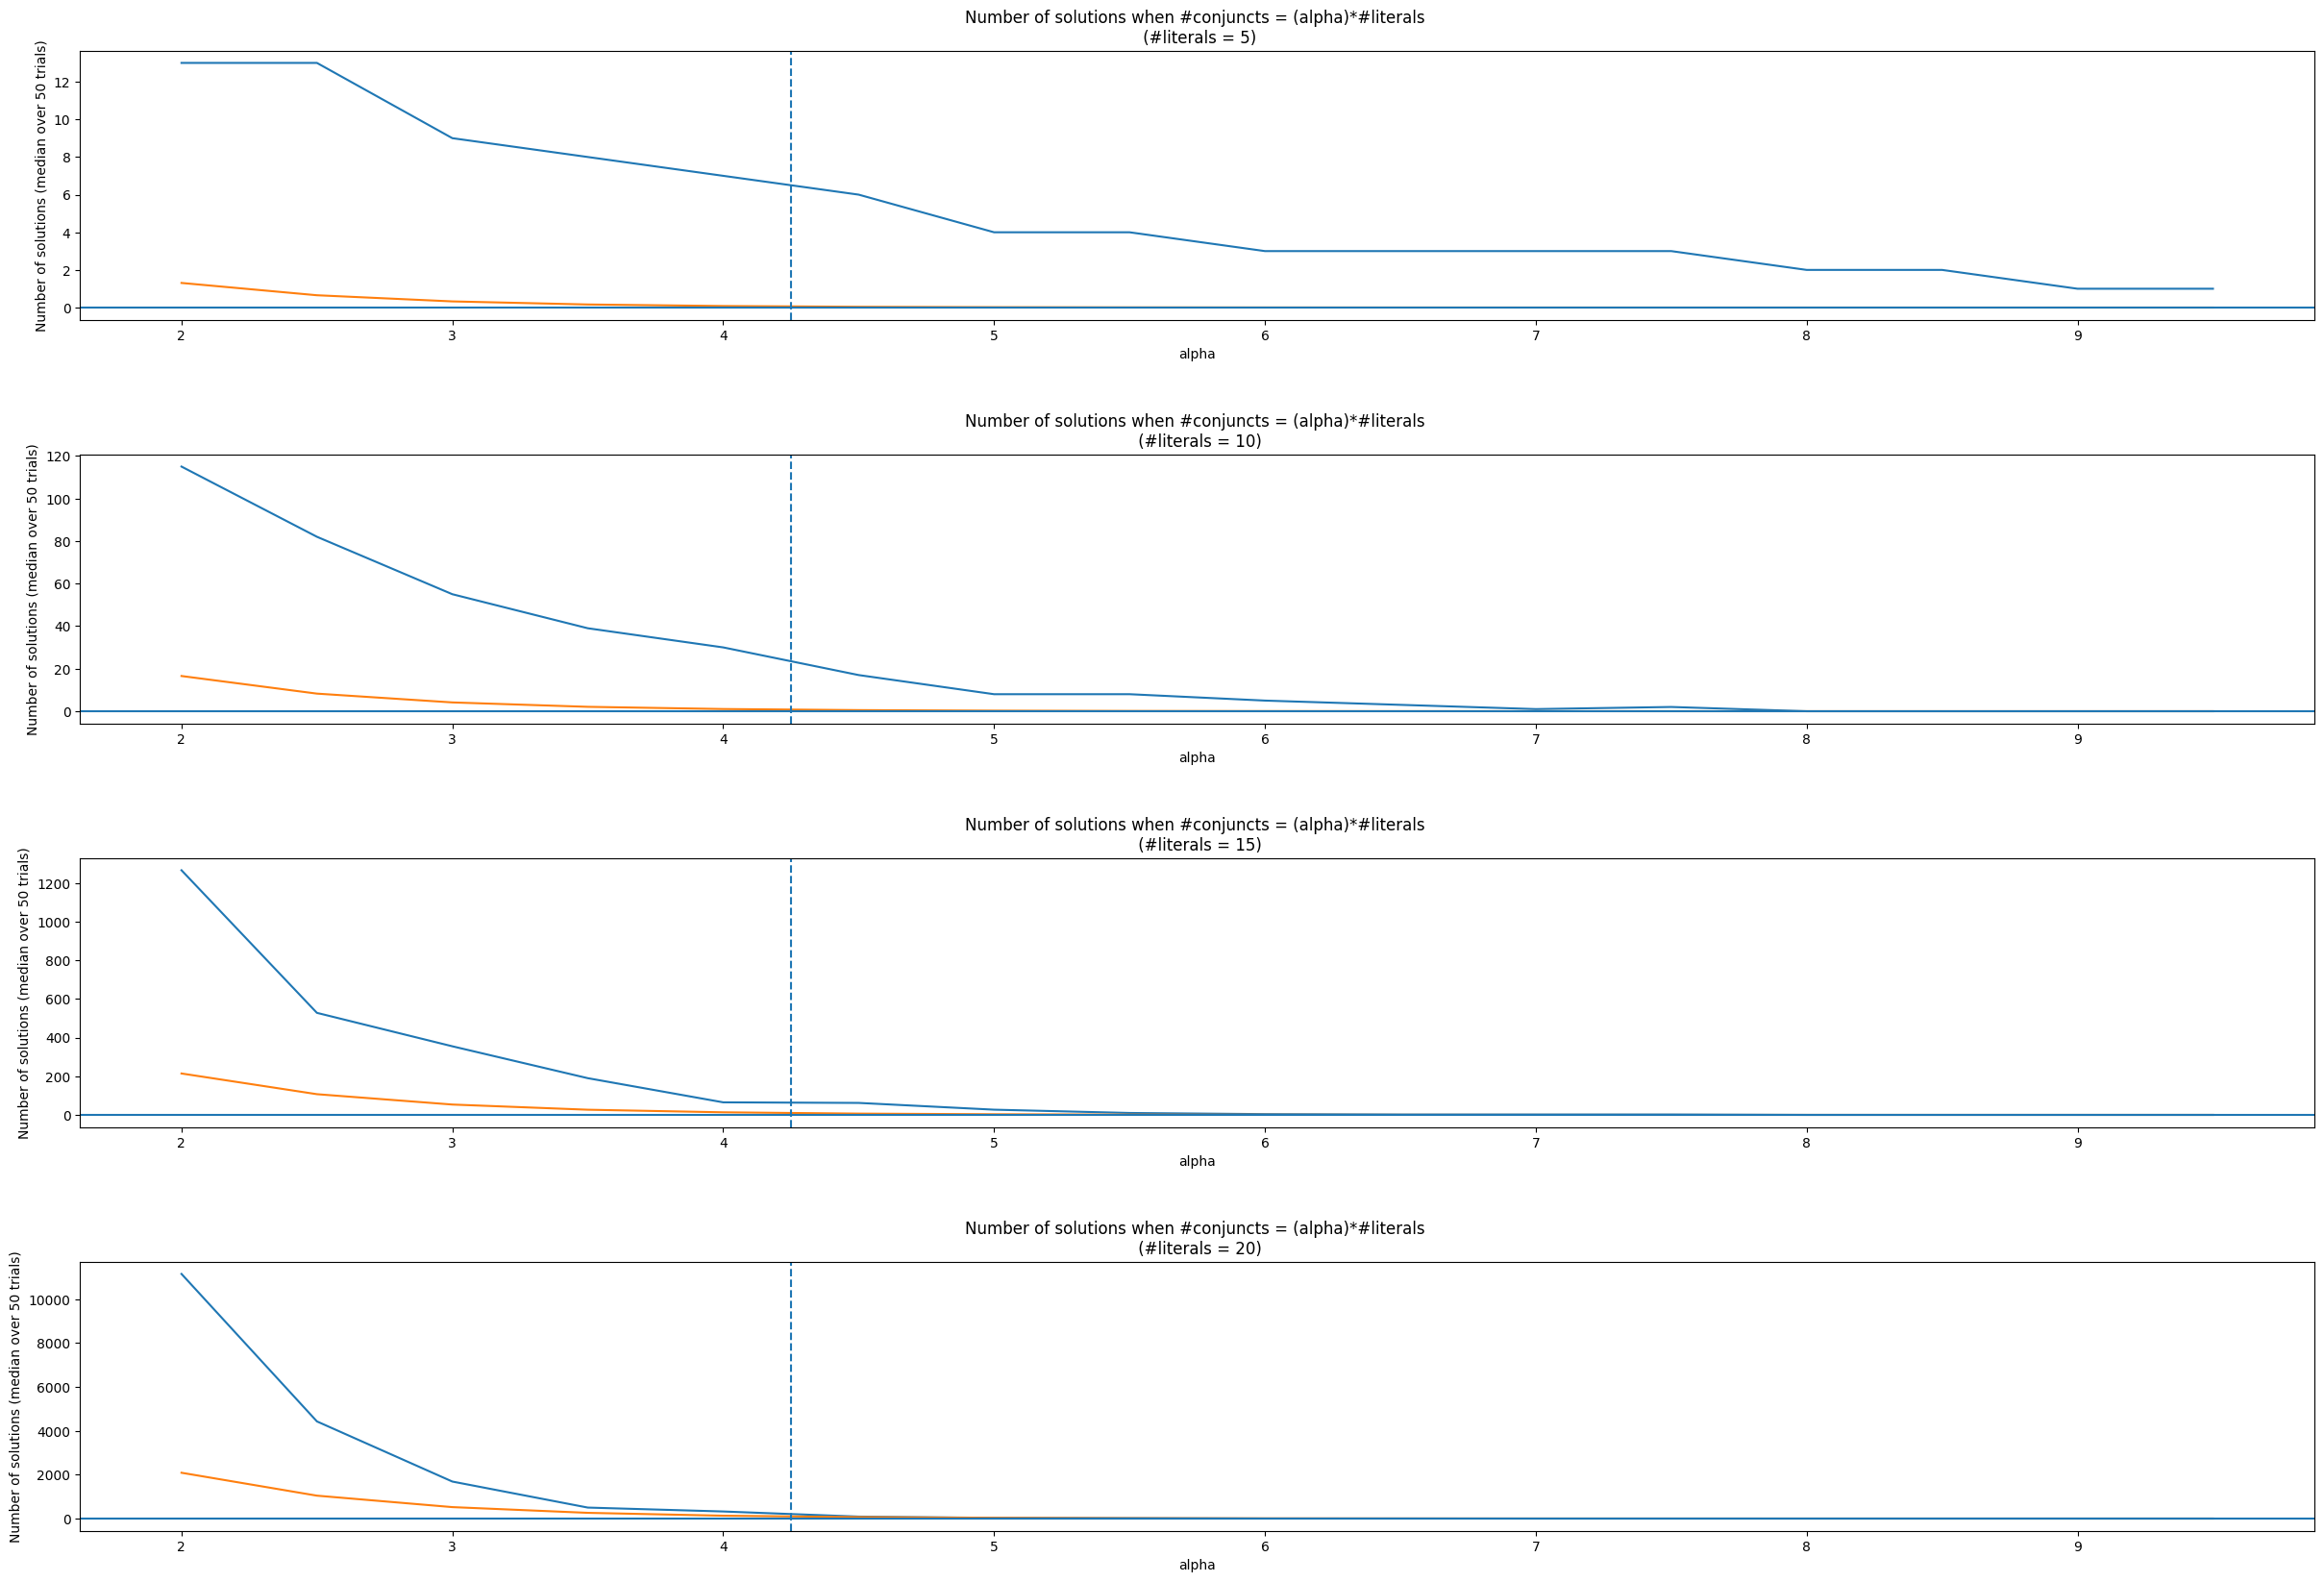

In [92]:
fig, axes = plt.subplots(len(num_of_solutions.keys()), 1, figsize = (30, 20))
counter = 0
for i in num_of_solutions.keys():
    x = list(np.arange(2, 10, 0.5))
    exp_func = [(num_of_solutions[i][0]*(np.log(i)))*(1-0.75)**x for x in list(np.arange(2, 10, 0.5))]
    axes[counter].plot(x, num_of_solutions[i])
    axes[counter].plot(x, exp_func)
    axes[counter].axhline(0)
    axes[counter].axvline(4.25, linestyle='--')
    axes[counter].set_xlabel("alpha"); axes[counter].set_ylabel("Number of solutions (median over 50 trials)")
    axes[counter].set_title("Number of solutions when #conjuncts = (alpha)*#literals \n (#literals = " + str(i) + ")")
    counter += 1
fig.subplots_adjust(hspace = 0.5)

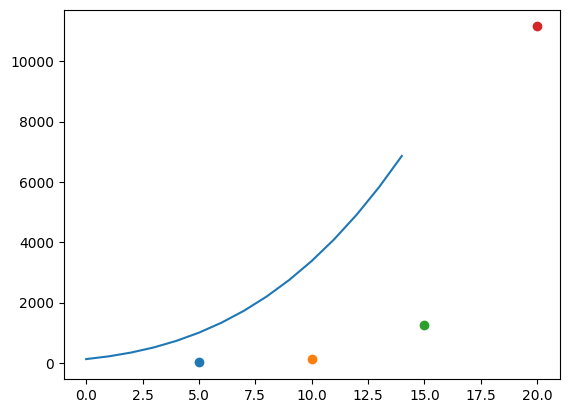

In [98]:
for k in num_of_solutions.keys():
    plt.scatter(k, num_of_solutions[k][0])
plt.plot([x**3 for x in range(5, 20)])

In [74]:
x = list(np.arange(2, 10, 0.5)); print(x)
[(x[i], num_of_solutions[15][i]) for i in range(len(x))]

[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


[(2.0, 1266.0),
 (2.5, 528.0),
 (3.0, 355.0),
 (3.5, 190.0),
 (4.0, 65.0),
 (4.5, 62.0),
 (5.0, 27.0),
 (5.5, 10.0),
 (6.0, 4.0),
 (6.5, 2.0),
 (7.0, 2.0),
 (7.5, 2.0),
 (8.0, 0.0),
 (8.5, 0.0),
 (9.0, 0.0),
 (9.5, 0.0)]

In [59]:
x

[2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5]

## From a Solver Propagations Perspective

In [ ]:
from math import floor

ksg = KSAT_Generator()
for num_literals in [10]:
    num_of_solutions = []
    propagations = []
    for x in list(np.arange(2, 10, 0.5)):

        solution_counts = []
        for _ in range(50):
            instance = ksg.random_kcnf(k = 3, n_literals = num_literals, n_conjuncts = floor(x*num_literals))
            solver.append_formula(instance)
            solver.solve()
            solution_count
        num_of_solutions.append(np.median(solution_counts))